In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import pymysql as mdb
import sqlalchemy as sa
import matplotlib.pyplot as plt 

In [2]:
con = mdb.connect(host='alfred-prod.cbyff1yl1xje.us-west-2.rds.amazonaws.com', 
                  user='insight', 
                  password='YWRt9fxYzx1PqHy', 
                  db='alfred_prod')
cur = con.cursor()
cur.execute('SHOW TABLES')
table_names = cur.fetchall()

In [3]:
table_names;

In [3]:
def table_to_df(table):
    cur.execute('SELECT * from {table}'.format(table=table))
    rows = cur.fetchall()
    df = pd.DataFrame( [[ij for ij in i] for i in rows])
    cur.execute('DESCRIBE {table}'.format(table=table))
    cols = cur.fetchall()
    dfcols = [i[0] for i in cols]
    df.columns = dfcols
    return df

In [4]:
match_feedbacks=table_to_df('match_feedbacks')

In [6]:
match = table_to_df('matches')

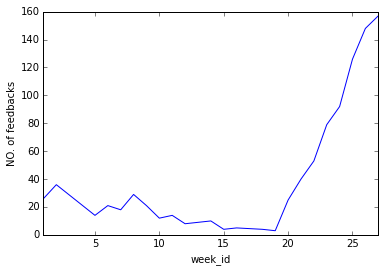

In [14]:
meeting_week=match_feedbacks['week_id'].value_counts().sort_index().plot()
meeting_week.set_xlabel("week_id")
meeting_week.set_ylabel("NO. of feedbacks")

In [5]:
match_feedbacks['rating'].describe()

count     1097
unique       5
top       5.00
freq       600
Name: rating, dtype: object

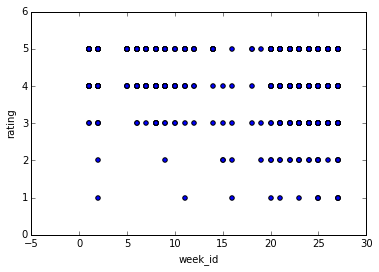

In [12]:
rating_week=plt.scatter(match_feedbacks['week_id'].values,match_feedbacks['rating'].values)
plt.xlabel("week_id")
plt.ylabel("rating")

In [6]:
match_feedbacks['rating'].value_counts()

5.00    600
4.00    334
3.00    118
2.00     29
1.00     16
dtype: int64

In [8]:
934.0/1097.0

0.8514129443938013

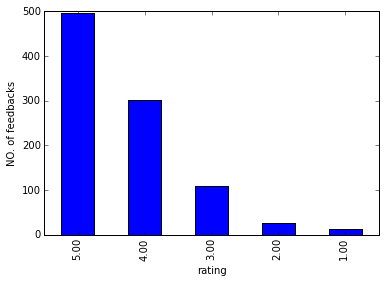

In [17]:
meeting_rating=match_feedbacks['rating'].value_counts().plot(kind='bar')
meeting_rating.set_xlabel("rating")
meeting_rating.set_ylabel("NO. of feedbacks")

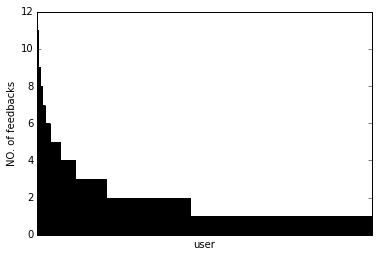

In [21]:
meeting_user=match_feedbacks['user_id'].value_counts().plot(kind='bar',xticks=[])
meeting_user.set_xlabel('user')
meeting_user.set_ylabel('NO. of feedbacks')

In [12]:
match_feedbacks['match_id'].value_counts()

2183     8
307      8
90       7
809      7
113      7
1081     6
16515    6
17590    6
1111     6
10       6
16555    6
266      6
267      6
936      6
17518    6
734      6
322      5
7217     5
378      5
708      5
16593    5
288      5
1272     5
2922     5
17754    5
16569    5
1817     5
1183     5
1193     5
12       5
        ..
18990    1
560      1
18996    1
17977    1
18645    1
17681    1
577      1
17921    1
17911    1
506      1
17876    1
17856    1
17858    1
451      1
18510    1
17869    1
18894    1
18896    1
18898    1
18902    1
18932    1
18903    1
17880    1
18908    1
17887    1
18036    1
18925    1
17902    1
18613    1
18432    1
dtype: int64

In [25]:
for i in range(len(match_feedbacks[match_feedbacks['rating']==1])):
    print i, match_feedbacks[match_feedbacks['rating']==1]['reason'].iloc[i]
    print ""

0 paired me with someone i already knew well, had already met, was also linkedin + fb + twitter connection

1 Number of pieces of feedback as this is the first negative meeting I've had from Weave. This may sound harsh, but I would not recommend Ananta for future paid concierge meetings for any members of the community for some time. I thought when I googled him that he was the founder of the Alike app, sold to Yahoo, but it turns out that he is using the same name as an app also in the same space, which seemed misleading. He is starting a consumer app around connecting people but did not have the most basic understanding of the consumer landscape or any of the companies in it after working on the project for 2+ years. Companies doing the exact same thing as him. The conversation was very one-sided in terms of him asking for who I knew that could be helpful. I provided candid feedback about his current stage and some suggestions of how to get to the next stage, but my recommendation wo

In [27]:
for i in range(len(match_feedbacks[match_feedbacks['rating']==2])):
    print i, match_feedbacks[match_feedbacks['rating']==2]['reason'].iloc[i]
    print ""

 0 because he was not a startup investor. I enjoyed meeting him though.

1 I would say I definitely learned and enjoyed his company, but wasn't helpful in my current pursuits. Vamarth was very nice.  I enjoyed talking with him but our interests were polar opposites.  He was enterprise and not necessarily interested in startups at this point in time.  For the next meeting would you be able to find an engineer who has either worked in Unity or has some gaming background?

2 We had absolutely nothing in common! He's a bright young man in advertising and I'm a lawyer looking for employment opportunities! Please my complaint is only with the matching of individuals and not with the person I met! You are going to get better at matching individuals according to their preferences if you want this to succeed.

3 no correllation to my requested match

4 This was my first weave meeting where the information exchange feels one sided. Daniel is quieter than the other people I have met through Weave

In [28]:
for i in range(len(match_feedbacks[match_feedbacks['rating']==3])):
    print i, match_feedbacks[match_feedbacks['rating']==3]['reason'].iloc[i]
    print ""

0 Munir is currently running a business looking for seed funding. I focus more on software companies with >$1M annual revenue. This meeting with Munir is a 3 because he is well connected though I would prefer and look forward to meet up with more private equity folks if possible, thanks!

1 Good introduction into a circle I would otherwise have no access to

2 Both entrepreneurs, which was good, but pretty different industries, which was challenging.

3 Wasn't a potential partner to do a deal with/ cross-promotion for my company

4 I enjoy meeting other entrepreneurs, but I think he was more interested in meeting potential investors.

5 wondering why the person I was matched with was looking to participate in these meetings. Seemed only half-heartedly interested in getting out and having coffee with me...just a little bit of an awkward meetings at times.

6 Networking meetings can vary in quality. Nothing about this particular one stood out, yet I'm glad I tried out Weave.

7 Not a gre

In [29]:
for i in range(len(match_feedbacks[match_feedbacks['rating']==4])):
    print i, match_feedbacks[match_feedbacks['rating']==4]['reason'].iloc[i]
    print ""

0 Gaming Product Manager/Entrepreneur. Understood a lot of stuff about gaming business. It was great he was a product manager. It would have been even more awesome if he was an enterprise guy.

1 Brent was interesting enough and we had a productive conversation, but neither of us was really in a position to help the other out!

2 Had a great time talking to Joanna. There were a few things to be improved with the service I'll explain below

3 Meeting Justin was great, made a connection I otherwise wouldn't have made.

4 Convenient and interesting conversation.

5 It was fun and interesting to meet a musician

6 Great guy. I can probably help him. Not sure that he can help me.

7 Good connection with some similar interests, which could be great for future work.

8 Works in the same field and shared interests

9 Peter was an interesting guy.

10 Interesting person but not directly in my field/ industry

11 Networking!

12 Interesting conversation

13 I enjoyed chatting with Travis - good 

In [34]:
for i in range(len(match_feedbacks[match_feedbacks['rating']==5])):
    print i, match_feedbacks[match_feedbacks['rating']==5]['reason'].iloc[i]
    print ""

0 Great chat

1 It was really fun to meet with someone without an agenda. Just meeting someone and getting to know them with no deliverables. Meeting without expectations was very freeing and interesting.

2 Was able to cover a wide variety of topics and conversation wasn't painful.

3 Had fun, great networking

4 The meeting was professional and on point with my expectations for a (random) networking opportunity

5 Good flowing conversation // mutual learning. Originally I wasn't sure about what we'd talk about or what not, but it ended up just working out. Based on industry knowledge / focus.

6 I received insightfully advice from an experienced founder, made a great connection and enjoyed a tasty cup of coffee.

7 Great idea, great communication, nice match

8 common interest/goals with match

9 We had a good conversation , both had similar interests 

10 The person I was matched with had no short-term expectations (like pitching a startup)

11 N/a

12 mutual interest. good conversa